In [3]:
import pandas_datareader.data as getData
import pandas as pd
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime as dt
#import blpapi
from scipy.stats import norm
import backtrader  as bt

In [4]:
data=pd.read_csv('@ES_5min_UStime.txt')

In [5]:
data['day']=pd.to_datetime(data['Date']+ ' ' + data['Time'])

In [6]:
df=data.copy()
df.index=data['day']
df

,Date,Time,Open,High,Low,Close,Up,Down,day
day,,,,,,,,,
2010-07-18 18:05:00,07/18/2010,18:05,936.75,937.50,935.00,935.25,1455,2424,2010-07-18 18:05:00
2010-07-18 18:10:00,07/18/2010,18:10,935.25,935.75,935.00,935.00,351,986,2010-07-18 18:10:00
2010-07-18 18:15:00,07/18/2010,18:15,935.25,935.50,935.00,935.25,395,44,2010-07-18 18:15:00
2010-07-18 18:20:00,07/18/2010,18:20,935.25,935.50,935.00,935.25,183,196,2010-07-18 18:20:00
2010-07-18 18:25:00,07/18/2010,18:25,935.00,936.25,935.00,936.25,355,123,2010-07-18 18:25:00
...,...,...,...,...,...,...,...,...,...
2020-11-15 23:30:00,11/15/2020,23:30,3612.75,3613.75,3612.25,3613.50,237,212,2020-11-15 23:30:00
2020-11-15 23:35:00,11/15/2020,23:35,3613.50,3613.50,3611.50,3612.00,169,274,2020-11-15 23:35:00
2020-11-15 23:40:00,11/15/2020,23:40,3612.25,3613.75,3611.75,3613.50,193,128,2020-11-15 23:40:00


In [7]:
def fnRSI(Co, m_N):
    df=pd.DataFrame(Co.copy())
    df.columns=['C']
    #ind=Co.index
    #df=pd.DataFrame({'C':Co})
    #df.index=ind

    df['U']= np.where(df['C'].diff(1) > 0, df['C'].diff(1), 0)
    df['D'] = np.where(df['C'].diff(1) < 0, df['C'].diff(1) *(-1), 0)

    df['AU'] = df['U'].rolling( window=m_N, min_periods=m_N).mean()
    df['AD'] = df['D'].rolling( window=m_N, min_periods=m_N).mean()
    df['RSI'] = df['AU'].div(df['AD']+df['AU']) *100
    
    return df['RSI']

In [8]:
RS=fnRSI(df['Close'],14)

In [9]:
df['RSI']=RS
df.head(50)

,Date,Time,Open,High,Low,Close,Up,Down,day,RSI
day,,,,,,,,,,
2010-07-18 18:05:00,07/18/2010,18:05,936.75,937.50,935.00,935.25,1455,2424,2010-07-18 18:05:00,NaN
2010-07-18 18:10:00,07/18/2010,18:10,935.25,935.75,935.00,935.00,351,986,2010-07-18 18:10:00,NaN
2010-07-18 18:15:00,07/18/2010,18:15,935.25,935.50,935.00,935.25,395,44,2010-07-18 18:15:00,NaN
2010-07-18 18:20:00,07/18/2010,18:20,935.25,935.50,935.00,935.25,183,196,2010-07-18 18:20:00,NaN
2010-07-18 18:25:00,07/18/2010,18:25,935.00,936.25,935.00,936.25,355,123,2010-07-18 18:25:00,NaN
2010-07-18 18:30:00,07/18/2010,18:30,936.00,936.25,935.75,936.00,105,82,2010-07-18 18:30:00,NaN
2010-07-18 18:35:00,07/18/2010,18:35,936.00,937.00,935.75,937.00,262,30,2010-07-18 18:35:00,NaN
2010-07-18 18:40:00,07/18/2010,18:40,936.75,937.25,936.25,937.25,79,83,2010-07-18 18:40:00,NaN
2010-07-18 18:45:00,07/18/2010,18:45,937.25,937.25,936.50,936.75,149,95,2010-07-18 18:45:00,NaN


In [10]:
df.index=data['day']
start='23:35'
end='3:30'
ren='d'

In [11]:
df['time_s']=0
re_index=df.between_time(start,end).index
df['time_s'].loc[re_index]=1


C:\Users\Prince\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [12]:
df.head(100)

,Date,Time,Open,High,Low,Close,Up,Down,day,RSI,time_s
day,,,,,,,,,,,
2010-07-18 18:05:00,07/18/2010,18:05,936.75,937.50,935.00,935.25,1455,2424,2010-07-18 18:05:00,NaN,0
2010-07-18 18:10:00,07/18/2010,18:10,935.25,935.75,935.00,935.00,351,986,2010-07-18 18:10:00,NaN,0
2010-07-18 18:15:00,07/18/2010,18:15,935.25,935.50,935.00,935.25,395,44,2010-07-18 18:15:00,NaN,0
2010-07-18 18:20:00,07/18/2010,18:20,935.25,935.50,935.00,935.25,183,196,2010-07-18 18:20:00,NaN,0
2010-07-18 18:25:00,07/18/2010,18:25,935.00,936.25,935.00,936.25,355,123,2010-07-18 18:25:00,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
2010-07-19 02:00:00,07/19/2010,02:00,940.00,941.00,939.75,940.75,621,588,2010-07-19 02:00:00,69.230769,1
2010-07-19 02:05:00,07/19/2010,02:05,940.50,941.25,940.00,941.00,1678,1013,2010-07-19 02:05:00,71.428571,1
2010-07-19 02:10:00,07/19/2010,02:10,941.00,941.50,940.25,940.25,646,464,2010-07-19 02:10:00,58.823529,1


In [13]:
re_index=df.between_time(start,end).index
dfd=df.loc[re_index]
close_index=dfd.between_time('3:00',end).index
dfd['close_trading_time']=np.nan
dfd['close_trading_time'].loc[close_index]=1


C:\Users\Prince\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [14]:
def rsi_trading(cc,rsi,time):
    df=pd.DataFrame({'cc':cc.copy()})
    ind=cc.index
    df.index=ind
    df['rsi']=rsi
    df['time']=time
    df['book']=0
    for i in df.index:
        if df['rsi'].loc[i] > 70 and df['time'].loc[i] ==1:
            df['book'].loc[i]= 0
        elif df['rsi'].loc[i] <30 and df['time'].loc[i] ==1:
            if df['book'].shift(1).loc[i] == 1:
                df['book'].loc[i]=1
            else:
                df['book'].loc[i] =1
        elif df['rsi'].loc[i] >=30 and  df['rsi'].loc[i] <=70 and df['time'].loc[i] ==1:
            if df['book'].shift(1).loc[i] ==1:
                df['book'].loc[i] =1
            else:
                df['book'].loc[i] =0
        else:
            df['book'].loc[i] =0
    return df      

In [15]:
def rsi_trading2(cc,rsi,time):
    df=pd.DataFrame({'cc':cc.copy()})
    ind=cc.index
    df.index=ind
    df['rsi']=rsi
    df['time']=time
    df['book']=0
    for i in df.index:
        if df['rsi'].loc[i] < 70 and df['time'].loc[i] ==1:
            df['book'].loc[i]= 1
        elif df['rsi'].loc[i] >=70 and df['time'].loc[i] ==1:
            if df['book'].shift(1).loc[i] ==1:
                df['book'].loc[i] =1
            else:
                df['book'].loc[i] =0

    return df   

In [ ]:
def rsi_trading3(cc,rsi,time):
    df=pd.DataFrame({'cc':cc.copy()})
    ind=cc.index
    df.index=ind
    df['rsi']=rsi
    df['time']=time
    df['book']=0
    for i in df.index:
        if df['rsi'].loc[i] < 30 and df['time'].loc[i] ==1:
            df['book'].loc[i]= 1
        elif df['rsi'].loc[i] >=30 and df['time'].loc[i] ==1:
            if df['book'].shift(1).loc[i] ==1:
                df['book'].loc[i] =1
            else:
                df['book'].loc[i] =0

    return df   

In [22]:
nam=df.loc['2010-1-1':]

In [27]:
T=rsi_trading(nam['Close'],nam['RSI'],nam['time_s'])

C:\Users\Prince\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [28]:
T.head(50)

,cc,rsi,time,book
day,,,,
2010-07-18 18:05:00,935.25,NaN,0,0
2010-07-18 18:10:00,935.00,NaN,0,0
2010-07-18 18:15:00,935.25,NaN,0,0
2010-07-18 18:20:00,935.25,NaN,0,0
2010-07-18 18:25:00,936.25,NaN,0,0
2010-07-18 18:30:00,936.00,NaN,0,0
2010-07-18 18:35:00,937.00,NaN,0,0
2010-07-18 18:40:00,937.25,NaN,0,0
2010-07-18 18:45:00,936.75,NaN,0,0


In [161]:
def in_out(date,in_hour,in_minute,out_hour,out_minute):
    date_time=dt.datetime.strptime(date,"%H:%M")
    
    if (date_time.hour ==in_hour)& (date_time.minute==in_minute):
        x="in"
    elif (date_time.hour ==out_hour) & (date_time.minute==out_minute):
        x="out"
    else:
        x=""
    return (x)

In [162]:
df['Time'][0]
print([in_out(df['Time'][0],18,5,3,30),df['Time'][0],dt.datetime.strptime(df['Time'][0],"%H:%M").hour,])

['in', '18:05', 18]


In [163]:


df['Time'][100]
in_out(df['Time'][0],23,30,3,30)

df['time_signal']=df.apply(lambda x: in_out(x['Time'],23,30,3,30),axis=1)



In [164]:
def time_range(x):
    df=pd.DataFrame({'time_trade':x.copy()})
    for i in df.index:
        if df.shift(1).loc[i,'time_trade'] == 'in' and df.loc[i,'time_trade'] == '':
            df.loc[i,'time_trade'] ='in'
        else:
            df.loc[i,'time_trade'] = df.loc[i,'time_trade']
    return (df)

In [130]:
df['time_trade']=df['time_signal'].copy()
df['time_trade']=np.where((df['time_trade']=='') & (df['time_trade'].shift(1)=='in'),'in',df['time_trade'])
#df['time_signal2']=np.where((df['time_signal']==-1),1,df['time_signal2'])
df['time_trade'].loc['2020-11-15']

day
2020-11-15 17:05:00      
2020-11-15 17:10:00      
2020-11-15 17:15:00      
2020-11-15 17:20:00      
2020-11-15 17:25:00      
2020-11-15 17:30:00      
2020-11-15 17:35:00      
2020-11-15 17:40:00      
2020-11-15 17:45:00      
2020-11-15 17:50:00      
2020-11-15 17:55:00      
2020-11-15 18:00:00      
2020-11-15 18:05:00      
2020-11-15 18:10:00      
2020-11-15 18:15:00      
2020-11-15 18:20:00      
2020-11-15 18:25:00      
2020-11-15 18:30:00      
2020-11-15 18:35:00      
2020-11-15 18:40:00      
2020-11-15 18:45:00      
2020-11-15 18:50:00      
2020-11-15 18:55:00      
2020-11-15 19:00:00      
2020-11-15 19:05:00      
2020-11-15 19:10:00      
2020-11-15 19:15:00      
2020-11-15 19:20:00      
2020-11-15 19:25:00      
2020-11-15 19:30:00      
                       ..
2020-11-15 21:25:00      
2020-11-15 21:30:00      
2020-11-15 21:35:00      
2020-11-15 21:40:00      
2020-11-15 21:45:00      
2020-11-15 21:50:00      
2020-11-15 21:55:00      
2020-11-

In [90]:
in_out(df['Time'][0],18,5,3,30)

0

In [26]:
ti=df['Time'].iloc[1]
dt.datetime.strptime(ti,'%H:%M').minute==1

False

In [50]:
def rsi_trading(cc,rsi):
    df=pd.DataFrame({'cc':cc.copy()})
    ind=cc.index
    df.index=ind
    df['rsi']=rsi
    df['book']=0
    for i in df.index:
        if df['rsi'].loc[i] > 70:
            df['book'].loc[i]= 0
        elif df['rsi'].loc[i] <30:
            if df['book'].shift(1).loc[i] == 1:
                df['book'].loc[i]=1
            else:
                df['book'].loc[i] =1
        elif df['rsi'].loc[i] >=30 and  df['rsi'].loc[i] <=70:
            if df['book'].shift(1).loc[i] ==1:
                df['book'].loc[i] =1
            else:
                df['book'].loc[i] =0
    return df      

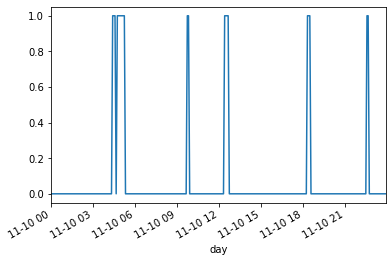

In [86]:
df['Book']=0
#df["Book"]=np.where(df['RSI'] > 70,0,0)
df["Book"]=np.where(df['RSI'] <= 30,1,0)
df["Back"]=df['Book'].shift(1)
df["Book"]=np.where((df['RSI'] >30)&(df['Back']==1),df["Back"],df["Book"])
#df["Book"]=np.where((df['RSI'] >=30 ) & (df['RSI']<=70) & (df['Book'].shift(1)==1),1,df['Book'])


df["Book"].loc['2020-11-10'].plot()

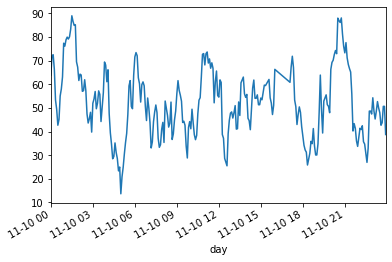

In [66]:
df["RSI"].loc['2020-11-10'].plot()

C:\Users\namdo\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A13B9BB348>],
      dtype=object)

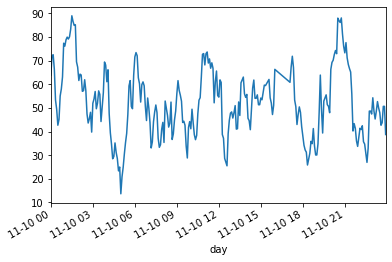

In [63]:
nam=df.loc['2020-11-8':]
nam
T=rsi_trading(nam['Close'],nam['RSI'])
#T['book'].loc['2020-11-10'].plot(subplots=True)
nam['RSI'].loc['2020-11-10'].plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A13BB617C8>],
      dtype=object)

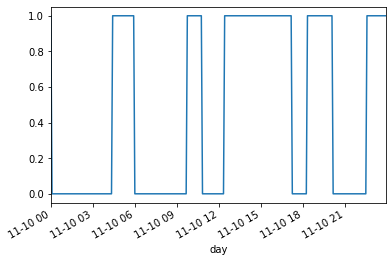

In [65]:
T['book'].loc['2020-11-10'].plot(subplots=True)

In [186]:
df.between_time('5:30','6:30')

,Date,Time,Open,High,Low,Close,Up,Down,day,R,RSI
day,,,,,,,,,,,
2010-07-19 05:30:00,07/19/2010,05:30,943.00,943.25,942.25,942.50,499,1075,2010-07-19 05:30:00,57.894737,57.894737
2010-07-19 05:35:00,07/19/2010,05:35,942.50,942.75,940.75,941.00,547,1291,2010-07-19 05:35:00,44.000000,44.000000
2010-07-19 05:40:00,07/19/2010,05:40,941.00,941.50,940.75,941.25,301,1046,2010-07-19 05:40:00,46.153846,46.153846
2010-07-19 05:45:00,07/19/2010,05:45,941.25,941.50,940.75,941.00,555,1268,2010-07-19 05:45:00,40.000000,40.000000
2010-07-19 05:50:00,07/19/2010,05:50,941.00,942.00,941.00,942.00,705,207,2010-07-19 05:50:00,51.851852,51.851852
...,...,...,...,...,...,...,...,...,...,...,...
2020-11-13 06:10:00,11/13/2020,06:10,3556.75,3558.50,3555.75,3556.25,605,400,2020-11-13 06:10:00,27.027027,27.027027
2020-11-13 06:15:00,11/13/2020,06:15,3556.25,3556.75,3555.00,3555.75,572,626,2020-11-13 06:15:00,32.258065,32.258065
2020-11-13 06:20:00,11/13/2020,06:20,3555.75,3558.25,3555.00,3557.25,935,890,2020-11-13 06:20:00,37.313433,37.313433


In [94]:
df.index=data['day']
start='23:35'
end='3:30'
ren='d'

In [95]:
re_index=df.between_time(start,end).index
dfd=df.loc[re_index]

In [18]:
O=dfd.resample(ren).first()
C=dfd.resample(ren).last()
H=pd.DataFrame(dfd['High'].resample(ren).max())

L=pd.DataFrame(dfd['Low'].resample(ren).min())
H.colnames='High'
L.colnames='Low'

In [10]:

dff=pd.concat([O['Open'],C['Close'],H['High'],L['Low']],axis=1).dropna()

In [11]:
dff

,Open,Close,High,Low
day,,,,
2010-07-18,939.75,939.00,939.75,938.75
2010-07-19,939.00,940.75,941.50,937.25
2010-07-20,940.75,952.00,953.00,937.25
2010-07-21,952.00,937.00,958.50,936.75
2010-07-22,937.00,963.25,964.00,936.25
...,...,...,...,...
2020-11-10,3520.50,3541.25,3559.00,3520.00
2020-11-11,3541.25,3549.75,3569.25,3540.25
2020-11-12,3549.75,3534.00,3555.00,3530.75


In [15]:
dff['O']=dff['Open'].shift(0)
dff['C']=dff['Close']
dff['H']=dff['High'].rolling(1).max()
dff['L']=dff['Low'].rolling(1).min()

In [16]:
dff.tail()

,Open,Close,High,Low,O,C,H,L
day,,,,,,,,
2020-11-10,3520.50,3541.25,3559.00,3520.00,3520.50,3541.25,3559.00,3520.00
2020-11-11,3541.25,3549.75,3569.25,3540.25,3541.25,3549.75,3569.25,3540.25
2020-11-12,3549.75,3534.00,3555.00,3530.75,3549.75,3534.00,3555.00,3530.75
2020-11-13,3534.00,3556.25,3558.25,3532.00,3534.00,3556.25,3558.25,3532.00
2020-11-15,3613.50,3612.75,3614.00,3611.50,3613.50,3612.75,3614.00,3611.50


In [17]:
dff['barri']=(dff['H']-dff['L'])/dff['C']

In [18]:
dff['barri_mov']=dff['barri'].rolling(1).mean()*0.5

In [19]:
dff['up_trigger']=dff['O']+dff['O']*dff['barri_mov'].shift(1)

In [20]:
dff['up_intra_ret']=np.where(dff['H']>dff['up_trigger'],(dff['C']-dff['up_trigger'])/dff['up_trigger'],0)
dff['up_intra_ret2']=(dff['C']-dff['O'])/dff['O']

In [21]:
IU=(1+dff['up_intra_ret']).cumprod()
IU2=(1+dff['up_intra_ret2']).cumprod()

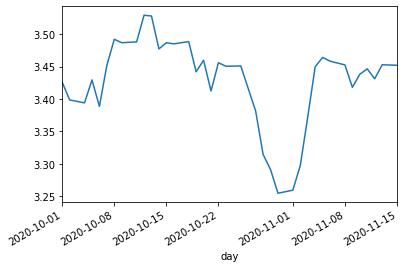

In [22]:
IU2.loc['2020-10-01':].plot()
